# Geo-Data Intake and Operations

> This notebook was made to demonstrate how to work with geographic data.

This Coding Notebook is the __third__ in a series.

An Interactive version can be found here <a href="https://colab.research.google.com/github/BNIA/colabs/blob/master/03_Map_Basics_Intake_and_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>.

This colab and more can be found at https://github.com/BNIA/colabs

- Content covered in previous tutorials will be used in later tutorials. 

- Concepts or code covered in previous tutorials will be used without being explaining in entirety.

- __If content can not be found in the current tutorial and is not covered in previous tutorials, please let me know.__

## About this Tutorial: 

### Before we begin

#### Tips

- If information is not covered in this tutorial it may be because the material was covered in the prior tutorial.
- A table of contents is provided in the menu to the left.
- And, that this notebook has been optimized for Google Colabs ran on a Chrome Browser. 
- While still fully usable, non-critical section of code (eg. Python Magics and HTML) may break if used in a different enviornment.

#### Legal

__Disclaimer__

**Views Expressed**:
All views expressed in this tutorial are the authors own and do not represent the opinions of any entity whatsover with which they have been, are now, or will be affiliated.

**Responsibility, Errors and Ommissions**: 
The author makes no assurance about the reliability of the information. The author makes takes no responsibility for updating the tutorial nor maintaining it porformant status. Under no circumstances shall the Author or its affiliates be liable for any indirect incedental, consequential, or special and or exemplary damages arising out of or in connection with this tutorial. Information is provided 'as is' with distinct plausability of errors and ommitions. Information found within the contents is attached with an **MIT license**. Please refer to the License for more information. 

**Use at Risk**:
Any action you take upon the information on this Tutorial is strictly at your own risk, and the author will not be liable for any losses and damages in connection with the use of this tutorial and subsequent products.

**Fair Use**
this site contains copyrighted material the use of which has not always been specifically authorized by the copyright owner. While no intention is made to unlawfully use copyrighted work, circumstanes may arise in which such material is made available in effort to advance scientific literacy. We believe this constitutes a 'fair use' of any such copyrighted material as provided for in section 107 of the US Copyright Law. In accordance with Titile 17 U.S.C. Section 108, the material on this tutorial is distributed without profit to those who have expressed a prior interest in receiving the included information for research and education purposes. 

for more information go to: http://www.law.cornell.edu/uscode/17/107.shtml. if you wish to use copyrighted material from this site for purposes of your own that go beyond 'fair use', ou must obtain permission from the copyright owner.

__License__

Copyright © 2019 BNIA-JFI

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


### Whats Inside?

#### __The Tutorial__

This notebook was made to demonstrate how to work with geographic data.

This lab is split into two sections. 
- The first part of this lab, a _guided walkthrough_, provides ample documentation so you understand how to perform basic geographic data operations.
- The second, more _advanced_ part of this notebook provides a single python function that handles everything covered in this lab (and more). 

#### __Objectives__

By the end of this tutorial users should have an understanding of:

- Reading in data (points/ geoms)
-- Convert lat/lng columns to point coordinates
-- Geocoding address to coordinates
-- Changing coordinate reference systems
-- Connecting to PostGisDB's
- Basic Operations
- Saving shape data
- Get Polygon Centroids
- Working with Points and Polygons
-- Map Points and Polygons
-- Get Points in Polygons
-- Create Choropleths
-- Create Heatmaps (KDE?)

# Background

## Coordinate Reference Systems (CRS)

Make sure the appropriate spatial Coordinate Reference System (CRS) is used when reading in your data!

CRS 4326 is th CRS most people are familar with when refering to latiude and longitudes.

Baltimore's 4326 CRS should be at (39.2, -76.6)

BNIA uses CRS 2248 internally #http://www.spatialreference.org/ref/epsg/2248/

Make sure all your dataset coordinates are using the same CRS

Perform conversions where needed 

Additional Information: https://docs.qgis.org/testing/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

## Raster Vs Vector Data 

There exists two types of Geospatial Data, Raster and Vector. 
Both have different file formats.

This lab will only cover vector data.

### Vector Data 
Vector Data: Individual points stored as (x,y) coordinates pairs. These points can be joined to create lines or polygons.

Format of Vector data

Esri Shapefile — .shp, .dbf, .shx
Description - Industry standard, most widely used. The three files listed above are needed to make a shapefile. Additional file formats may be included.

Geographic JavaScript Object Notation — .geojson, .json
Description — Second most popular, Geojson is typically used in web-based mapping used by storing the coordinates as JSON.

Geography Markup Language — .gml
Description — Similar to Geojson, GML has more data for the same amount of information.

Google Keyhole Markup Language  — .kml, .kmz
Description — XML-based and predominantly used for google earth. KMZ is a the newer, zipped version of KML.

### Raster Data 
Raster Data: Cell-based data where each cell represent geographic information. An Aerial photograph is one such example where each pixel has a color value

Raster Data Files: 
GeoTIFF — .tif, .tiff, .ovr
ERDAS Imagine — .img
IDRISI Raster — .rst, .rdc


Information Sourced From: https://towardsdatascience.com/getting-started-with-geospatial-works-1f7b47955438

**Vector Data: Census Geographic Data**:
- **Geographic Coordinate Data** is provided by the census and compliments their census geographies 
- https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2010.html
- https://www.census.gov/programs-surveys/acs/geography-acs/geography-boundaries-by-year.html 
- Bnia created and provides for free geographic boundary data that compliment these CSA's

## Coordinate Encoding

When you first recieve a spatial dataset, the spatial column may need to be encoded to convert its 'text' data type values into understood 'coordinate' data types before it can be understood/processed accordingly. 

Namely, there are two ways to encode text into coordinates: 
- df[geom] = df[geom].apply(lambda x: loads( str(x) ))
- df[geom] = [Point(xy) for xy in zip(df.x, df.y)]

The first approach can be used for text taking the form "Point(-76, 39)" and will encode the text too coordinates.
The second approach is useful when creating a point from two columns containing lat/lng information and will create Point coordinates from the two columns.

More on this later

# Guided Walkthrough

## SETUP:

### Import Modules

In [ ]:
%%capture
! pip install -U -q PyDrive
! pip install geopy
! pip install geopandas
! pip install geoplot

In [ ]:
%%capture 
# These imports will handle everything
import os
import sys
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import psycopg2
import pyproj
from pyproj import Proj, transform
# conda install -c conda-forge proj4
from shapely.geometry import Point
from shapely import wkb
from shapely.wkt import loads
# https://pypi.org/project/geopy/
from geopy.geocoders import Nominatim

# In case file is KML, enable support
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw'
fiona.drvsupport.supported_drivers['KML'] = 'rw'

### Configure Enviornment

In [ ]:
# This will just beautify the output

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.precision', 2)
# pd.reset_option('max_colwidth')
pd.set_option('max_colwidth', 20)
# pd.reset_option('max_colwidth')

In [ ]:
#hide
# %matplotlib inline
# !jupyter nbextension enable --py widgetsnbextension

### (Optional) Local File Access

In [ ]:
# (Optional) Run this cell to gain access to Google Drive (Colabs only) 
from google.colab import drive

# Colabs operates in a virtualized enviornment
# Colabs default directory is at ~/content.
# We mount Drive into a temporary folder at '~/content/drive' 

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive/'My Drive'/colabs/DATA

/content/drive/My Drive/colabs/DATA


In [ ]:
ls

 1983_2013_music1.txt                       hungary/
 baltimore-births/                          iw_data.csv
 baltimore-shootings-persons.csv            JEOPARDY.json
 bounds/                                    lobbying/
 concrete.csv                               political/
 crosswalk-catchment-zones-tracts.gsheet    Ticker_Symbols.json
 crosswalk-census-communities-2010.gsheet   tidyCrawl_2018.csv
 CSA2010_AdjacentCommunities.xlsx           titanic.csv
 exemptions/                                vs10to17.csv
'FDIC Baltimore Banks.xlsx'                 vs10to17_master.xlsm
 Food_Bank_and_Pantry_Sites_2018.xlsx       vsa_data_toy.xlsx


#### File Access Conveince Functions 

In [ ]:
# Find Relative Path to Files
def findFile(root, file):
    for d, subD, f in os.walk(root):
        if file in f:
            return "{1}/{0}".format(file, d)
            break 

# To 'import' a script you wrote, map its filepath into the sys
def addPath(root, file): sys.path.append(os.path.abspath( findFile( './', file) ))

## Retrieve GIS Data

### Approach 1: Reading in Data Directly

If you are using Geopandas, Direct imports only work with geojson and shape files

In [ ]:
# A Dataset taken from the public database provided by BNIAJFI hosted by Esro / ArcGIS
# BNIA ArcGIS Homepage: https://data-bniajfi.opendata.arcgis.com/
gdf = gpd.read_file("https://opendata.arcgis.com/datasets/b738a8587b6d479a8824d937892701d8_0.geojson");

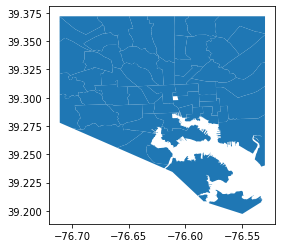

In [ ]:
gdf.plot()

### Approach 2: Converting Pandas into Geopandas

#### Approach 2: Example 1

This approach loads a map using a geometry column

In [ ]:
# The attributes are what we will use.
in_crs = 2248 # The CRS we recieve our data 
out_crs = 4326 # The CRS we would like to have our data represented as
geom = 'geometry' # The column where our spatial information lives.

In [ ]:
# A url to a public Dataset
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRWBYggh3LGJ3quU-PhGXT2NvAtUb3aiXdZVKAO5VWCreUWZpAGz1uTbLvq6rF1TrJNiE81o6R5AP8F/pub?output=csv'

# Read in the dataframe
df = pd.read_csv(url)

# Convert the geometry column datatype from a string of text into a coordinate datatype
df[geom] = df[geom].apply(lambda x: loads( str(x) ))

# Process the dataframe as a geodataframe with a known CRS and geom column
gdf = GeoDataFrame(df, crs=in_crs, geometry=geom)


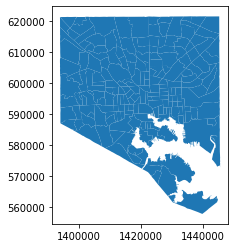

In [ ]:
gdf.plot()

In [ ]:
gdf.head()

,TRACTCE10,GEOID10,NAME10,CSA,Tract,geometry
0,151000,24510151000,1510.0,Dorchester/Ashbu...,1510,POLYGON ((140341...
1,80700,24510080700,807.0,Greenmount East,807,POLYGON ((142876...
2,80500,24510080500,805.0,Clifton-Berea,805,POLYGON ((142836...
3,150500,24510150500,1505.0,Greater Mondawmin,1505,POLYGON ((140920...
4,120100,24510120100,1201.0,North Baltimore/...,1201,POLYGON ((142276...


#### Approach 2: Example 2: BANKS

This example is using data constructed at the end of Tutorial 1. 

Be sure to access the menu in the left drawer, hit the 'Files' tab and upload it.

In [ ]:
# The attributes are what we will use.
in_crs = 2248 # The CRS we recieve our data 
out_crs = 4326 # The CRS we would like to have our data represented as
geom = 'geometry' # The column where our spatial information lives.

# Description: This was created in the previous tutorial. 
# Description: It can be accessed via accessing a google drive, or by using the upload file feature in the left hand menu. 
# Columns: Bank Information with TRACT, CSA, and GEOMETRY columns.

# To create this dataset I had to commit a full outer join in the previous tutorial. 
# In this way geometries will be included even if there merge does not have a direct match. 
# What this will do is that it means at least one (near) empty record for each community will exist that includes (at minimum) the geographic information and name of a Community.
# That way if no point level information existed in the community, that during the merge the geoboundaries are still carried over.

# If a user wanted to create a heatmap of this data, they would first have to perform an aggregation of their columns onto unique geometry columns.
# It would be the aggregate of of a column that gets colorized on the heatmap. 
# Aggregation operations can easily be performed using a pivot table in XL. 
# I hope to embed support for this functionality in the future. 
# Heatmaps are covered in the next tutorial. 
# Pre-Aggregated information is required to continue on to the next tutorial.
url = 'test_save_data_with_geom_and_csa.csv'

# Read in the dataframe
df = pd.read_csv(url)

# Convert the geometry column datatype from a string of text into a coordinate datatype
df[geom] = df[geom].apply(lambda x: loads( str(x) ))

# Process the dataframe as a geodataframe with a known CRS and geom column
gdf = GeoDataFrame(df, crs=in_crs, geometry=geom)

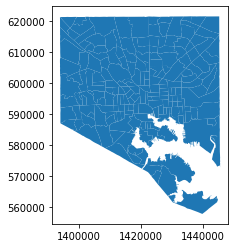

In [ ]:
gdf.plot()

In [ ]:
gdf.head()

,Bank Name,Address(es),Census Tract,GEOID2010,TRACTCE10,GEOID10,NAME10,CSA,Tract,geometry
0,Arundel Federal ...,333 E. Patapsco ...,250401.0,2.45e+10,250401,24510250401,2504.01,Brooklyn/Curtis ...,2504,POLYGON ((-76.59...
1,NaN,3601 S Hanover St,250401.0,2.45e+10,250401,24510250401,2504.01,Brooklyn/Curtis ...,2504,POLYGON ((-76.59...
2,"Bank of America,...",20 N Howard St,40100.0,2.45e+10,40100,24510040100,401.00,Downtown/Seton Hill,401,POLYGON ((-76.61...
3,NaN,100 S Charles St...,40100.0,2.45e+10,40100,24510040100,401.00,Downtown/Seton Hill,401,POLYGON ((-76.61...
4,Branch Banking a...,2 N CHARLES ST,40100.0,2.45e+10,40100,24510040100,401.00,Downtown/Seton Hill,401,POLYGON ((-76.61...


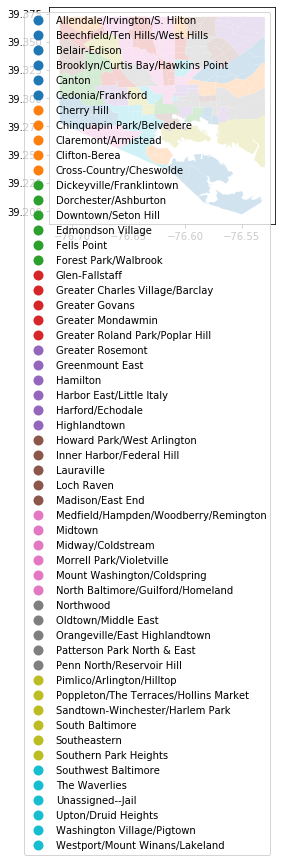

In [ ]:
# In order for this choropleth to work, the total number of banks in each csa must be tallied.
# This can be done programmatically, but i havent added the code. 
# The column needs to be changed from CSA to whatever this new tallied column is named.
gdf.plot( column='CSA', legend=True)

#### Approach 3: Method 1: Convert Column(s) to Coordinate

Later in this tutorial we will show how you may find geometric bounds that coorespond with a points location ( points in polygons ). This can be a useful trick when we we want to create a heatmap of point data with specified boundaries.

If a user wanted to create a heatmap of this data...

they would first have to perform an aggregation of their columns onto unique geometry columns 

Possible Path: (points in polygons -> crosswalk -> merge GeoJson).

It would be the aggregate of of a column that gets colorized on the heatmap. 

Aggregation operations can easily be performed using a pivot table in XL. 

I hope to embed support for this functionality in the future. 

Heatmaps are covered in the next tutorial. 

Pre-Aggregated information is required to continue onto the next tutorial.

Approach 3: Method 1:  Example 1:

In [ ]:
# More Information: https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#from-longitudes-and-latitudes

# If your data has coordinates in two columns run this cell
# It will create a geometry column from the two.
# A public dataset is not provided for this example and will not run.

# Load DF HERE. Accidently deleted the link. Need to refind. 
# Just rely on example 2 for now. 
df = ''

df['x'] = pd.to_numeric(df['x'], errors='coerce')
df['y'] = pd.to_numeric(df['y'], errors='coerce')
# df = df.replace(np.nan, 0, regex=True)

# An example of loading in an internal BNIA file
crs = {'init' :'epsg:2248'} 
geometry=[Point(xy) for xy in zip(df.x, df.y)]
gdf = gpd.GeoDataFrame( df.drop(['x', 'y'], axis=1), crs=in_crs, geometry=geometry)

Approach 3: Method 1:  Example 2: FOOD BANK PANTRIES

In [ ]:
# Alternate Primary Table
# Table: Food Bank And Pantry Sites, 
# XLSX Sheet: Baltimore City Pantries Tracts
# Columns: X	Y	OBJECTID	Name	Address	City_1	State	Zip	# in Zip	FIPS
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT3lG0n542sIGE2O-C8fiXx-qUZG2WDO6ezRGcNsS4z8MM30XocVZ90P1UQOIXO2w/pub?gid=1152681223&single=true&output=csv'

# Read in the dataframe
df = pd.read_csv(url)

In [ ]:
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
# df = df.replace(np.nan, 0, regex=True)

# An example of loading in an internal BNIA file
crs = {'init' :'epsg:2248'} 
geometry=[Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = gpd.GeoDataFrame( df.drop(['X', 'Y'], axis=1), crs=in_crs, geometry=geometry)

In [ ]:
gdf.head()

,OBJECTID,Name,Address,City_1,State,Zip,# in Zip,FIPS,geometry
0,1,Victory Forest -...,10000 Brunswick ...,Silver Spring,MD,20817,NaN,NaN,POINT (-77.05673...
1,2,Glassmanor Eleme...,1011 Marcy Avenue,Oxon Hill,MD,20745,NaN,NaN,POINT (-76.99036...
2,3,Apple Blossoms,1013 Cresthaven ...,Silver Spring,MD,20903,NaN,NaN,POINT (-76.99155...
3,4,Lakeview Apartme...,10250 West Lake Dr.,Bethesda,MD,20817,NaN,NaN,POINT (-77.14929...
4,5,Central Gardens,103 Cindy Lane,Capitol Heights,MD,,NaN,NaN,POINT (-76.88974...


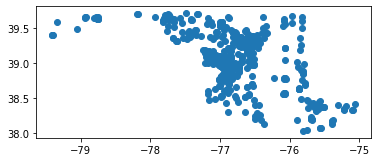

In [ ]:
gdf.plot()

In [ ]:
import folium
from folium import plugins
def map_points(df, lat_col='latitude', lon_col='longitude', zoom_start=11, plot_points=False, pt_radius=15, draw_heatmap=False, heat_map_weights_col=None, heat_map_weights_normalize=True, heat_map_radius=15):
    """Creates a map given a dataframe of points. Can also produce a heatmap overlay

    Arg:
        df: dataframe containing points to maps
        lat_col: Column containing latitude (string)
        lon_col: Column containing longitude (string)
        zoom_start: Integer representing the initial zoom of the map
        plot_points: Add points to map (boolean)
        pt_radius: Size of each point
        draw_heatmap: Add heatmap to map (boolean)
        heat_map_weights_col: Column containing heatmap weights
        heat_map_weights_normalize: Normalize heatmap weights (boolean)
        heat_map_radius: Size of heatmap point

    Returns:
        folium map object
    """

    ## center map in the middle of points center in
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()

    curr_map = folium.Map(location=[middle_lat, middle_lon],
                          zoom_start=zoom_start)

    # add points to map
    if plot_points:
        for _, row in df.iterrows():
            folium.CircleMarker([row[lat_col], row[lon_col]],
                                radius=pt_radius,
                                popup=row['Name'],
                                fill_color="#3db7e4", # divvy color
                               ).add_to(curr_map)

    # add heatmap
    if draw_heatmap:
        # convert to (n, 2) or (n, 3) matrix format
        if heat_map_weights_col is None:
            cols_to_pull = [lat_col, lon_col]
        else:
            # if we have to normalize
            if heat_map_weights_normalize:
                df[heat_map_weights_col] = \
                    df[heat_map_weights_col] / df[heat_map_weights_col].sum()

            cols_to_pull = [lat_col, lon_col, heat_map_weights_col]

        stations = df[cols_to_pull].as_matrix()
        curr_map.add_children(plugins.HeatMap(stations, radius=heat_map_radius))

    return curr_map

In [ ]:
map_points(df, lat_col='Y', lon_col='X', zoom_start=11, plot_points=True, pt_radius=15, draw_heatmap=True, heat_map_weights_col=None, heat_map_weights_normalize=True, heat_map_radius=15)

In [ ]:
# A Short Example of a HEATMAP. A Choropleth is provided further below.
# Please note, for some reason the library that renders heatmaps is not loading on this colab platform. 
# I have to find an alternative. It shouldn't be too hard, I'm just on vacation.
# gplt.pointplot(gdf, hue='DIP', legend=True)

In [ ]:
https://docs.google.com/spreadsheets/d/e/2PACX-1vT3lG0n542sIGE2O-C8fiXx-qUZG2WDO6ezRGcNsS4z8MM30XocVZ90P1UQOIXO2w/pub?gid=1152681223&single=true&output=csv

#### Approach 3: Method 2: Geocoding Addresses to Coordinates

In [ ]:
# More information vist: https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders

# In this example we retrieve and map a dataset with no lat/lng but containing an address

# The url listed below is public.
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRRZHuKiBFmnQHQc_NMbAiPT4-EiKVHDhb4jmqblAZNVCqcdC0VvOmp0tadTa8aLYf4XAEDCF1AzzdQ/pub?output=csv'
df = pd.read_csv(url)

# In this example our data is stored in the 'STREET' attribute
addrCol = 'STREET'
geometry = []
geolocator = Nominatim(user_agent="specify_your_app_name_here")

for index, row in df.iterrows():
  # We will try and return an address for each Street Name
  try: 
      # retrieve the geocoded information of our street address
      geol = geolocator.geocode(row[addrCol], timeout=None)
      
      print('Geocoding: ', location.address) 
      # print(location.raw)
      
      # create a mappable coordinate point from the response object's lat/lang values.
      pnt = Point(geol.longitude, geol.latitude)
      
      # Append this value to the list of geometries
      geometry.append(pnt)
      
  except: 
      # If no street name was found decide what to do here.
      # df.loc[index]['geom'] = Point(0,0) # Alternate method
      geometry.append(Point(0,0))
      
# Finally, we stuff the geometry data we created back into the dataframe
df['geometry'] = geometry

# Convert the dataframe into a geodataframe and map it!
gdf = gpd.GeoDataFrame( df, geometry=geometry)

### Approach 4: Connecting to a PostGIS database

In the following example pulls point geodata from a Postgres database.

We will pull the postgres point data in two manners. 
- SQL query where an SQL query uses ST_Transform(the_geom,4326) to transform the_geom's CRS from a DATABASE Binary encoding into standard Lat Long's
- Using a plan SQL query and performing the conversion using gpd.io.sql.read_postgis() to pull the data in as 2248 and convert the CRS using .to_crs(epsg=4326)
- These examples will not work in colabs as their is no local database to connect to and has been commented out for that reason

In [ ]:
# This Notebook can be downloaded to connect to a database
'''
conn = psycopg2.connect(host='', dbname='', user='', password='', port='')

# DB Import Method One
sql1 = 'SELECT the_geom, gid, geogcode, ooi, address, addrtyp, city, block, lot, desclu, existing FROM housing.mdprop_2017v2 limit 100;'
pointData = gpd.io.sql.read_postgis(sql1, conn, geom_col='the_geom', crs=2248)
pointData = pointData.to_crs(epsg=4326)

# DB Import Method Two
sql2 = 'SELECT ST_Transform(the_geom,4326) as the_geom, ooi, desclu, address FROM housing.mdprop_2017v2;'
pointData = gpd.GeoDataFrame.from_postgis(sql2, conn, geom_col='the_geom', crs=4326)
pointData.head()
pointData.plot()
'''

"\nconn = psycopg2.connect(host='', dbname='', user='', password='', port='')\n\n# DB Import Method One\nsql1 = 'SELECT the_geom, gid, geogcode, ooi, address, addrtyp, city, block, lot, desclu, existing FROM housing.mdprop_2017v2 limit 100;'\npointData = gpd.io.sql.read_postgis(sql1, conn, geom_col='the_geom', crs=2248)\npointData = pointData.to_crs(epsg=4326)\n\n# DB Import Method Two\nsql2 = 'SELECT ST_Transform(the_geom,4326) as the_geom, ooi, desclu, address FROM housing.mdprop_2017v2;'\npointData = gpd.GeoDataFrame.from_postgis(sql2, conn, geom_col='the_geom', crs=4326)\npointData.head()\npointData.plot()\n"

## Basics Operations

### Inspection

In [ ]:
def geomSummary(gdf): return type(gdf), gdf.crs, gdf.columns;
# for p in df['Tract'].sort_values(): print(p)
geomSummary(gdf)

(geopandas.geodataframe.GeoDataFrame,
 2248,
 Index(['OBJECTID', 'Name', 'Address', 'City_1', 'State', 'Zip', '# in Zip',
        'FIPS', 'geometry'],
       dtype='object'))

### Converting CRS

In [ ]:
# Convert the CRS of the dataset into one you desire
# The gdf must be loaded with a known crs in order for the to_crs conversion to work
# We use this often to converting BNIAs custom CRS to the common type 
out_crs = 4326
gdf = gdf.to_crs(epsg=out_crs)

### Saving

In [ ]:
# Here is code to comit a simple save
filename = 'TEST_FILE_NAME'
gdf.to_file(f"{filename}.geojson", driver='GeoJSON')

In [ ]:
# Here is code to save this new projection as a geojson file and read it back in
gdf = gdf.to_crs(epsg=2248) #just making sure
gdf.to_file(filename+'.shp', driver='ESRI Shapefile')
gdf = gpd.read_file(filename+'.shp')

# Advanced

**Operations:** 

- Reading in data (points/ geoms)
-- Convert lat/lng columns to point coordinates
-- Geocoding address to coordinates
-- Changing coordinate reference systems
-- Connecting to PostGisDB's
- Basic Operations
- Saving shape data
- Get Polygon Centroids
- Working with Points and Polygons
-- Map Points and Polygons
-- Get Points in Polygons

**Input(s):** 
- Dataset (points/ bounds) url
- Points/ bounds geometry column(s)
- Points/ bounds crs's
- Points/ bounds mapping color(s)
- New filename

**Output:** File

## Create Geospatial Functions

This function will handle common geo spatial exploratory methods. It covers everything discussed in the basic operations and more!

In [ ]:
#
# Work With Geometry Data
# Description: geomSummary, getPointsInPolygons, mapPointsInPolygons, getCentroids
# 
#
def workWithGeometryData(method=False, df=False, polys=False, ptsCoordCol=False, polygonsCoordCol=False, pntsClr='red', polysClr='white'):
  print('TheStartOfSomethingNew')
 
  def geomSummary(df): return type(gdf), gdf.crs, gdf.columns;
  
  def getCentroid(df, col): return df[col].representative_point()
  #final['centroid'] = final['geometry'].centroid

  # To 'import' a script you wrote, map its filepath into the sys
  def getPointsInPolygons(pts, polygons, ptsCoordCol, polygonsCoordCol): 
      # We're going to keep a list of how many points we find.
      pts_in_polys = []

      # Loop over polygons with index i.
      for i, poly in polygons.iterrows():
          print('Searching for point within Geom:', poly )
          # Keep a list of points in this poly
          pts_in_this_poly = []

          # Now loop over all points with index j.
          for j, pt in pts.iterrows():
              if poly[polygonsCoordCol].contains(pt[ptsCoordCol]):
                  # Then it's a hit! Add it to the list,
                  # and drop it so we have less hunting.
                  pts_in_this_poly.append(pt[ptsCoordCol])
                  pts = pts.drop([j])

          # We could do all sorts, like grab a property of the
          # points, but let's just append the number of them.
          pts_in_polys.append(len(pts_in_this_poly))
          print('Found this many points within the Geom:', len(pts_in_this_poly) )

      # Add the number of points for each poly to the dataframe.
      polygons['number of points'] = gpd.GeoSeries(pts_in_polys)
      return polygons
  
  def mapPointsandPolygons(pnts, polys, pntsCl, polysClr):
    print('mapPointsandPolygons');
    # We restrict to South America.
    ax = polys.plot( color=polysClr, edgecolor='black')

    # We can now plot our ``GeoDataFrame``.
    pnts.plot(ax=ax, color=pntsClr)

    return plt.show()
  
  
  if method=='summary': return geomSummary(df);
  if method=='pinp': return getPointsInPolygons(df, polys, ptsCoordCol, polygonsCoordCol);
  if method=='pandp': return mapPointsandPolygons(df, polys, pntsClr, polysClr);
  if method=='centroid': return getCentroid(df, col);

Processing Geometry is tedius enough to merit its own handler

In [ ]:
def readInGeometryData(url=False, porg=False, geom=False, lat=False, lng=False, revgeocode=False,  save=False, in_crs=4326, out_crs=False):

  def reverseGeoCode(df, lat ):
    # STREET	CITY	STATE ZIP NAME
    # , format_string="%s, BALTIMORE MD"
    geometry = []
    geolocator = Nominatim(user_agent="specify_your_app_name_here")
    for index, row in df.iterrows():
      try: 
          geol = geolocator.geocode(row[lat], timeout=None)
          pnt = Point(geol.longitude, geol.latitude)
          geometry.append(pnt)
      except: 
          geometry.append(Point(-76, 39) )
          print(row[lat]);
    return geometry
    
    
    
  def readFile(url, geom, lat, lng, revgeocode, in_crs, out_crs):
    df = False
    ext = url[-3:]
    
    #XLS
    # b16 = pd.read_excel('Jones.BirthsbyCensus2016.XLS', sheetname='Births')

    # The file extension is used to determine the appropriate import method.
    if ext in ['son', 'kml', 'shp']: gdf = gpd.read_file(url)  

    if ext == 'csv':
      df = pd.read_csv(url)
      print( df.columns)
      # Read using Geom, Lat, Lat/Lng, revGeoCode 
      if revgeocode=='y': df['geometry'] = reverseGeoCode(df, lat)
      elif geom: df['geometry'] = df[geom].apply(lambda x: loads( str(x) )) 
      elif lat==lng: df['geometry'] = df[lat].apply(lambda x: loads( str(x) ))
      elif lat!=lng: df['geometry'] = gpd.points_from_xy(df[lng], df[lat]);
      
      gdf = GeoDataFrame(df, crs=in_crs, geometry='geometry') #crs=2248
      if not out_crs == in_crs: gdf = gdf.to_crs(epsg=out_crs)
    return gdf
  
  
  def getGeoParams(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs):
    addr=False
    
    if not url: url = input("Please enter the location of your dataset: " ) 
    # if url[-3:] == 'csv' : 
    #   df = pd.read_csv(url,index_col=0,nrows=1)
    #   print(df.columns)

    # Geometries inside
    if geom and not (lat and lng): porg = 'g'
    # Point data inside
    elif not geom and lat or lng: 
      porg = 'p';
      if not lat: lat = lng
      if not lng: lng = lat  
        
    # If the P/G could not be infered...
    if not (porg in ['p', 'g']): 
      if not revgeocode in ['y', 'n']: revgeocode = input("Do your records need reverse geocoding: (Enter: y/n') " )
      if revgeocode == 'y': porg = 'p'; lng = lat = input("Please enter the column name where the address is stored: " );
      elif revgeocode == 'n': porg = input("""Do the records in this dataset use (P)oints or (g)eometric polygons?: (Enter: 'p' or 'g') """ );
      else: return getGeoParams(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs);
        
      if porg=='p':
          if not lat: lat = input("Please enter the column name where the latitude coordinate is stored: " );
          if not lng: lng = input("Please enter the column name where the longitude cooridnate is stored: (Could be same as the lat) " );
      elif porg=='g': 
        if not geom: geom = input("Please enter column name where the geometry data is stored: (*optional, skip if unkown)" );
      else: return getGeoParams(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs)
    
    if not out_crs: out_crs=in_crs
      
    return url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs
  
  # This function uses all the other functions
  def main(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs):
    
    # Check for missing values. retrieve them
    if (not (url and porg) ) or (
        not (porg == 'p' or porg == 'g') ) or (
        porg == 'g' and not geom) or (
        porg == 'p' and (not (lat and lng) ) ): 
      return readInGeometryData( *getGeoParams(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs) );

    print(f"RECIEVED url: {url}, \n porg: {porg}, \n geom: {geom}, \n lat: {lat}, \n lng: {lng}, \n revgeocode: {revgeocode}, \n in_crs: {in_crs}, \n out_crs: {out_crs}")
    
    # Quit if the Columns dont exist -> CSV Only
    # status = checkColumns(url, geom, lat, lng)
    # if status == False: print('A specified column does not exist'); return False;

    # Perform operation
    gdf = readFile(url, geom, lat, lng, revgeocode, in_crs, out_crs)
    
    # Tidy up
    
    # Save
    # if save: saveGeoData(gdf, url, fileName, driver='esri')
    
    return gdf
  
  return main(url, porg, geom, lat, lng, revgeocode, save, in_crs, out_crs)

## Example: Using the advanced Functions

### Simple  Examples

RECIEVED url: https://docs.google.com/spreadsheets/d/e/2PACX-1vRWBYggh3LGJ3quU-PhGXT2NvAtUb3aiXdZVKAO5VWCreUWZpAGz1uTbLvq6rF1TrJNiE81o6R5AP8F/pub?output=csv, 
 porg: g, 
 geom: geometry, 
 lat: False, 
 lng: False, 
 revgeocode: False, 
 in_crs: 2248, 
 out_crs: 4326
Index(['TRACTCE10', 'GEOID10', 'NAME10', 'CSA', 'Tract', 'geometry'], dtype='object')


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


TheStartOfSomethingNew


(geopandas.geodataframe.GeoDataFrame,
 2248,
 Index(['OBJECTID', 'Name', 'Address', 'City_1', 'State', 'Zip', '# in Zip',
        'FIPS', 'geometry'],
       dtype='object'))

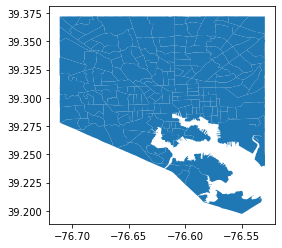

In [ ]:
# Example 0: Loading describing and plotting a simple shapefile.
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRWBYggh3LGJ3quU-PhGXT2NvAtUb3aiXdZVKAO5VWCreUWZpAGz1uTbLvq6rF1TrJNiE81o6R5AP8F/pub?output=csv'
geom = readInGeometryData(url=url, geom='geometry', in_crs=2248, out_crs=4326)
workWithGeometryData('summary', geom) 
geom.plot()

In [ ]:
# Example Points 1: Loading Tax data from addresses. Get sent to coordinates.
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRRZHuKiBFmnQHQc_NMbAiPT4-EiKVHDhb4jmqblAZNVCqcdC0VvOmp0tadTa8aLYf4XAEDCF1AzzdQ/pub?output=csv'
points = readInGeometryData(url=url, revgeocode='y', lat='ADDRESS')
workWithGeometryData('summary', points) 

PO BOX 67008, BALTIMORE MD
PO BOX 4496, BALTIMORE MD
120 W NORTH AVENUE STE 307, BALTIMORE MD
PO BOX 27039, BALTIMORE MD
1731 E CHASE ST, BALTIMORE MD
100 LIGHT STREET 12TH FLOOR, BALTIMORE MD
1138 HOLLINS STREET 2ND FLOOR, BALTIMORE MD


In [ ]:
# Example Points 2: Loading Food Pantries as Points using this new tool
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT3lG0n542sIGE2O-C8fiXx-qUZG2WDO6ezRGcNsS4z8MM30XocVZ90P1UQOIXO2w/pub?gid=1152681223&single=true&output=csv'
crs = {'init' :'epsg:2248'} 
points = readInGeometryData(url=url, porg='p', geom=False, lat='Y', lng='X', revgeocode=False,  save=False, in_crs=crs, out_crs=crs)
points.plot()

In [ ]:
points

Lets see how our map looks when we have points atop polygons

TheStartOfSomethingNew
mapPointsandPolygons


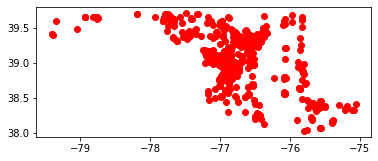

In [ ]:
workWithGeometryData( 'pandp', points, gdf)

Looking good! But the red dots are a bit too noisy. Lets create a choropleth instead!

We can start of by finding which points are inside of which polygons!

In [ ]:
points.columns
gdf.columns

Index(['X', 'Y', 'OBJECTID', 'Name', 'Address', 'City_1', 'State', 'Zip',
       '# in Zip', 'FIPS', 'geometry'],
      dtype='object')

Index(['TRACTCE10', 'GEOID10', 'NAME10', 'CSA', 'Tract', 'geometry'], dtype='object')

a choropleth map is created at the bottom of the output once the the code below this cell is exectued for our Food Pantries Data.

In [ ]:
# https://stackoverflow.com/questions/27606924/count-number-of-points-in-multipolygon-shapefile-using-python
ptsCoordCol = 'geometry'
polygonsCoordCol = 'geometry'

pointsInPolysChloro = workWithGeometryData('pinp', points, gdf, 'geometry' , 'geometry')

# And now that we have that settled, lets map it!

pointsInPolysChloro.plot( column='number of points', legend=True)

Alternately, we could map the centroid of boundaries within another boundary to find boundaries within boundaries